In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/Rakshitha/Downloads/Larger_Package_Delivery_Route_Optimization.csv")

In [6]:
label_encoders = {}
categorical_columns = ["Origin", "Destination", "Priority"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
df["TimeWindow_Start"] = df["TimeWindow_Start"].apply(lambda x: int(x[:2]) + int(x[3:]) / 60)
df["TimeWindow_End"] = df["TimeWindow_End"].apply(lambda x: int(x[:2]) + int(x[3:]) / 60)


In [8]:
features = ["Distance_km", "Priority", "TimeWindow_Start", "TimeWindow_End"]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

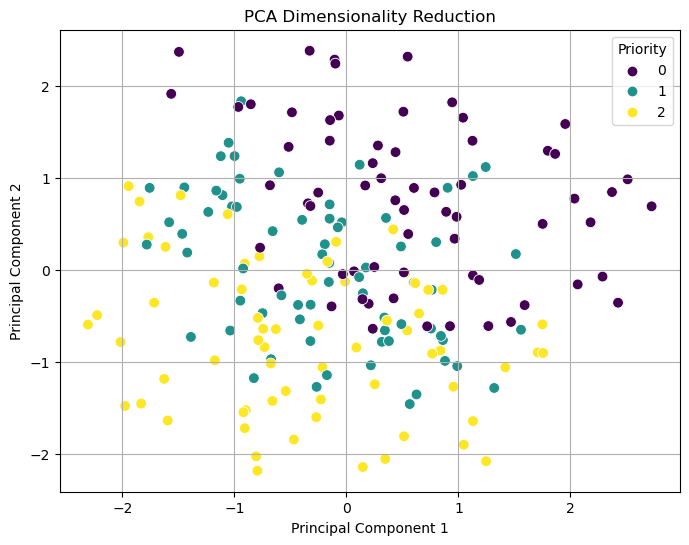

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", data=df, hue="Priority", palette="viridis", s=60)
plt.title("PCA Dimensionality Reduction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Priority")
plt.grid(True)
plt.show()

In [11]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PCA1: {explained_variance[0]:.2f}")
print(f"Explained Variance by PCA2: {explained_variance[1]:.2f}")


Explained Variance by PCA1: 0.28
Explained Variance by PCA2: 0.26
